In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
sal = pd.read_csv('/content/Salary Data.csv')
sal.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0


In [3]:
sal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 375 entries, 0 to 374
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  373 non-null    float64
 1   Gender               373 non-null    object 
 2   Education Level      373 non-null    object 
 3   Job Title            373 non-null    object 
 4   Years of Experience  373 non-null    float64
 5   Salary               373 non-null    float64
dtypes: float64(3), object(3)
memory usage: 17.7+ KB


In [5]:
sal.columns


Index(['Age', 'Gender', 'Education Level', 'Job Title', 'Years of Experience',
       'Salary'],
      dtype='object')

In [7]:
sal.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,373.0,37.431635,7.069073,23.0,31.0,36.0,44.0,53.0
Years of Experience,373.0,10.030831,6.557007,0.0,4.0,9.0,15.0,25.0
Salary,373.0,100577.345845,48240.013482,350.0,55000.0,95000.0,140000.0,250000.0


In [10]:
sal.shape

(375, 6)

In [11]:
sal.isna().sum()

Age                    2
Gender                 2
Education Level        2
Job Title              2
Years of Experience    2
Salary                 2
dtype: int64

In [12]:
sal = sal.dropna()

In [13]:
sal.isna().sum()

Age                    0
Gender                 0
Education Level        0
Job Title              0
Years of Experience    0
Salary                 0
dtype: int64

In [14]:
sal.shape

(373, 6)

In [16]:
sal.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 373 entries, 0 to 374
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  373 non-null    float64
 1   Gender               373 non-null    object 
 2   Education Level      373 non-null    object 
 3   Job Title            373 non-null    object 
 4   Years of Experience  373 non-null    float64
 5   Salary               373 non-null    float64
dtypes: float64(3), object(3)
memory usage: 20.4+ KB


In [19]:
sal['Education Level'].unique()

array(["Bachelor's", "Master's", 'PhD'], dtype=object)

<Axes: xlabel='Salary', ylabel='Count'>

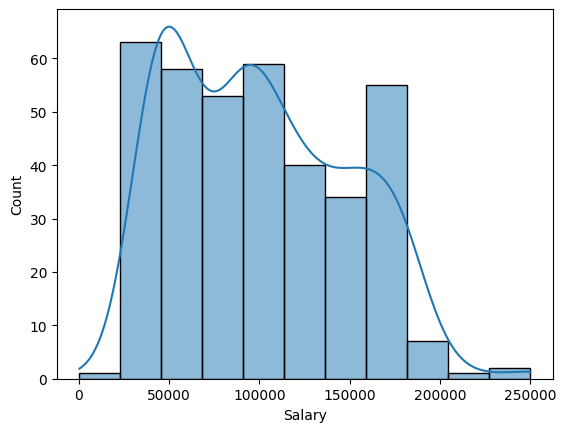

In [23]:
# Create a histogram or a density plot to visualize the distribution of 'Salary'. Does it follow a normal distribution?
sns.histplot(data = sal , x ='Salary',kde=True)

<ipython-input-25-fbd8f8c5fbe4>:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(sal['Salary'], shade=True, color='blue')


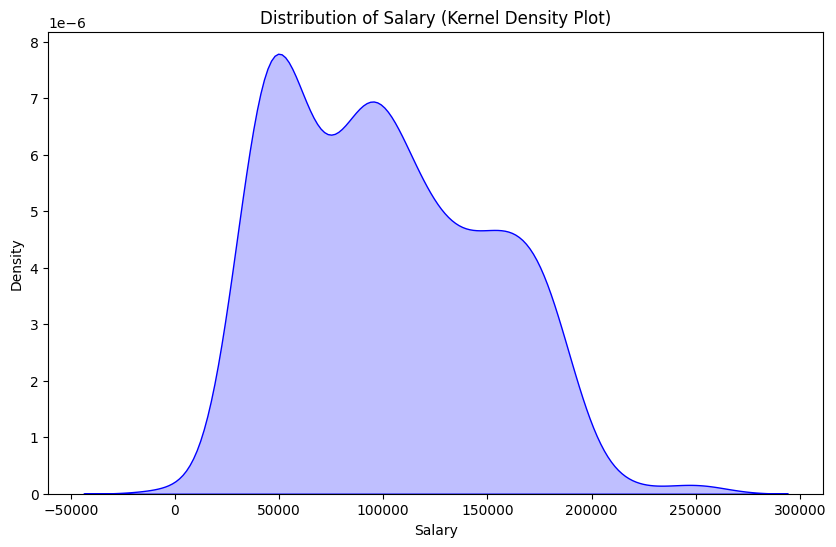

In [25]:
plt.figure(figsize=(10, 6))
sns.kdeplot(sal['Salary'], shade=True, color='blue')
plt.title('Distribution of Salary (Kernel Density Plot)')
plt.xlabel('Salary')
plt.ylabel('Density')
plt.show()

<Axes: xlabel='Gender', ylabel='Salary'>

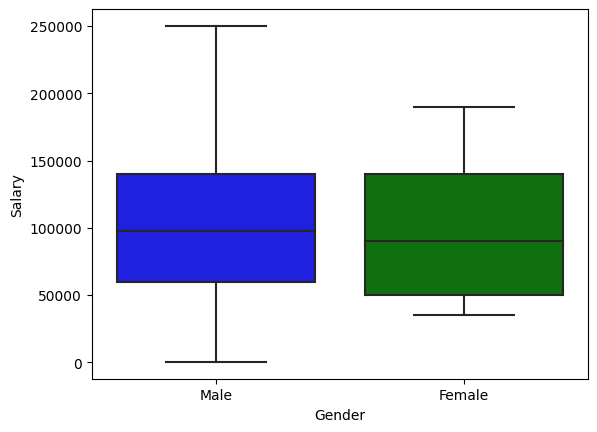

In [26]:
# Group the data by 'Gender' and create a bar chart to compare the average salary between genders. Are there significant differences?
sns.boxplot(x = 'Gender',y='Salary',data = sal,palette=['blue', 'green'])

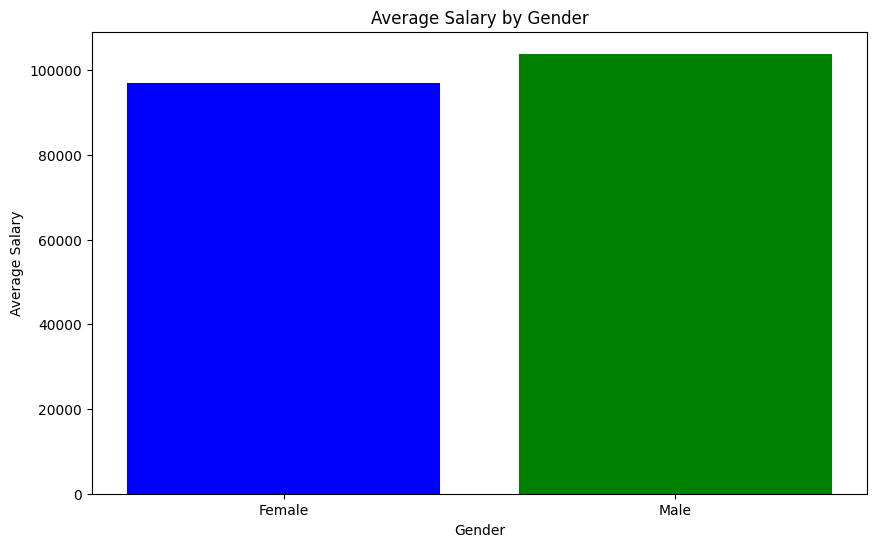

In [27]:
gender_salary = sal.groupby('Gender')['Salary'].mean().reset_index()

# Create a bar chart to compare average salary by gender
plt.figure(figsize=(10, 6))
plt.bar(gender_salary['Gender'], gender_salary['Salary'], color=['blue', 'green'])  # Adjust colors as needed
plt.title('Average Salary by Gender')
plt.xlabel('Gender')
plt.ylabel('Average Salary')
plt.show()

<Axes: xlabel='Age', ylabel='Salary'>

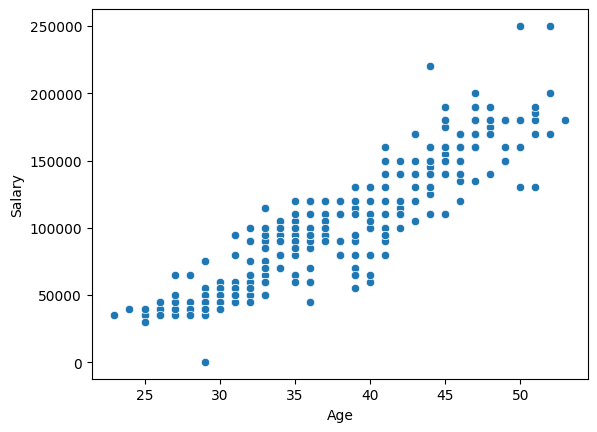

In [28]:
sns.scatterplot(data = sal , x = "Age",y='Salary')

seems linear

<Axes: xlabel='Education Level', ylabel='Salary'>

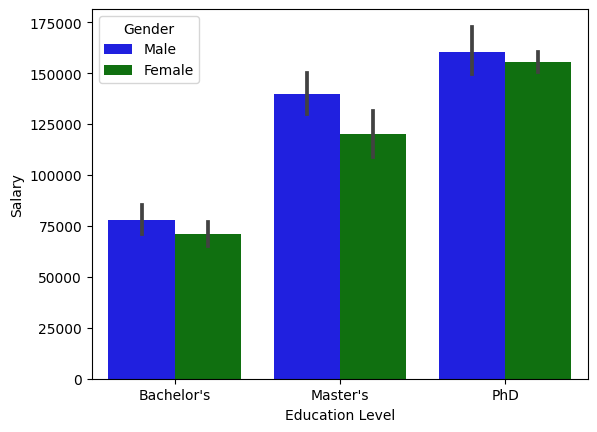

In [31]:
sns.barplot(x = 'Education Level',y='Salary',data = sal,palette=['blue', 'green'],hue = 'Gender')

In [35]:
sal['Job Title'].value_counts()

Director of Marketing              12
Director of Operations             11
Senior Business Analyst            10
Senior Marketing Analyst            9
Senior Marketing Manager            9
                                   ..
Business Development Manager        1
Customer Service Representative     1
IT Manager                          1
Digital Marketing Manager           1
Junior Web Developer                1
Name: Job Title, Length: 174, dtype: int64

<Axes: xlabel='Years of Experience', ylabel='Salary'>

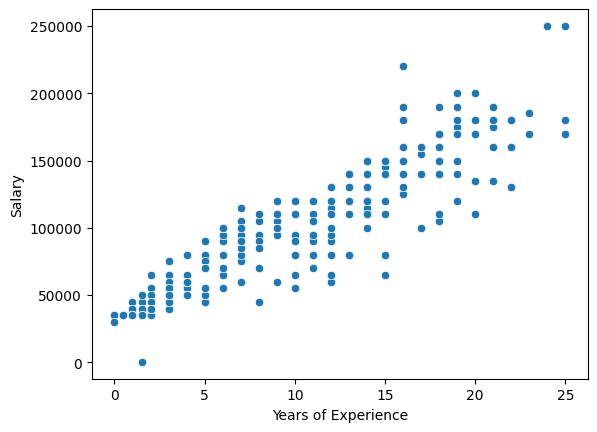

In [38]:
sns.scatterplot(data = sal,x = 'Years of Experience',y = 'Salary')

In [39]:
from sklearn.preprocessing import LabelEncoder

In [40]:
sal['Education Level']

0      Bachelor's
1        Master's
2             PhD
3      Bachelor's
4        Master's
          ...    
370    Bachelor's
371      Master's
372    Bachelor's
373    Bachelor's
374           PhD
Name: Education Level, Length: 373, dtype: object

In [41]:
lb = LabelEncoder()

In [42]:
lb.fit(sal['Education Level'])

LabelEncoder()

In [44]:
lb.transform(sal['Education Level'])

array([0, 1, 2, 0, 1, 0, 1, 0, 0, 2, 1, 0, 0, 1, 0, 0, 1, 2, 0, 0, 1, 1,
       0, 0, 1, 0, 1, 0, 2, 1, 0, 0, 1, 0, 2, 0, 0, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 1, 2, 0, 0, 1, 0, 1, 0, 0, 1, 2, 0, 1, 1, 0, 0, 2, 0, 1,
       0, 0, 1, 1, 0, 0, 2, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 2, 0, 1, 0, 0,
       1, 0, 2, 0, 0, 1, 0, 0, 2, 0, 1, 0, 0, 1, 1, 0, 1, 2, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 0, 2, 0, 1, 0, 1, 0, 0, 2, 0, 1, 0, 0, 1, 1, 0,
       1, 2, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 2, 0, 0, 1, 0, 1, 2, 0,
       1, 0, 0, 1, 2, 0, 0, 1, 0, 0, 1, 0, 0, 2, 0, 1, 1, 0, 0, 1, 0, 2,
       0, 0, 1, 0, 1, 2, 0, 0, 0, 1, 0, 2, 0, 0, 1, 0, 0, 1, 0, 0, 2, 0,
       1, 1, 0, 0, 1, 0, 2, 0, 0, 1, 0, 1, 2, 0, 0, 0, 1, 0, 2, 0, 0, 1,
       0, 0, 1, 0, 0, 2, 0, 1, 1, 0, 0, 1, 0, 2, 0, 0, 1, 0, 0, 2, 0, 0,
       2, 0, 0, 1, 0, 0, 1, 0, 1, 2, 0, 0, 0, 1, 0, 2, 0, 0, 2, 0, 0, 0,
       0, 1, 0, 0, 2, 0, 0, 1, 0, 0, 2, 0, 0, 1, 0, 0, 1, 0, 0, 2, 0, 0,
       0, 0, 0, 2, 0, 0, 1, 0, 0, 2, 0, 0, 1, 0, 0,

In [45]:
lb.classes_

array(["Bachelor's", "Master's", 'PhD'], dtype=object)

In [47]:
sal['Education Level'][:3]

0    Bachelor's
1      Master's
2           PhD
Name: Education Level, dtype: object

In [48]:
sal['Edu'] = lb.transform(sal['Education Level'])

In [49]:
sal.Edu

0      0
1      1
2      2
3      0
4      1
      ..
370    0
371    1
372    0
373    0
374    2
Name: Edu, Length: 373, dtype: int64

<Axes: xlabel='Edu', ylabel='Salary'>

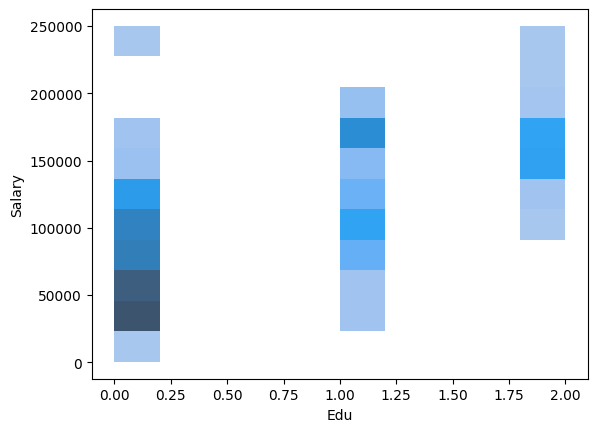

In [52]:
sns.histplot(data = sal,x = 'Edu',y='Salary')

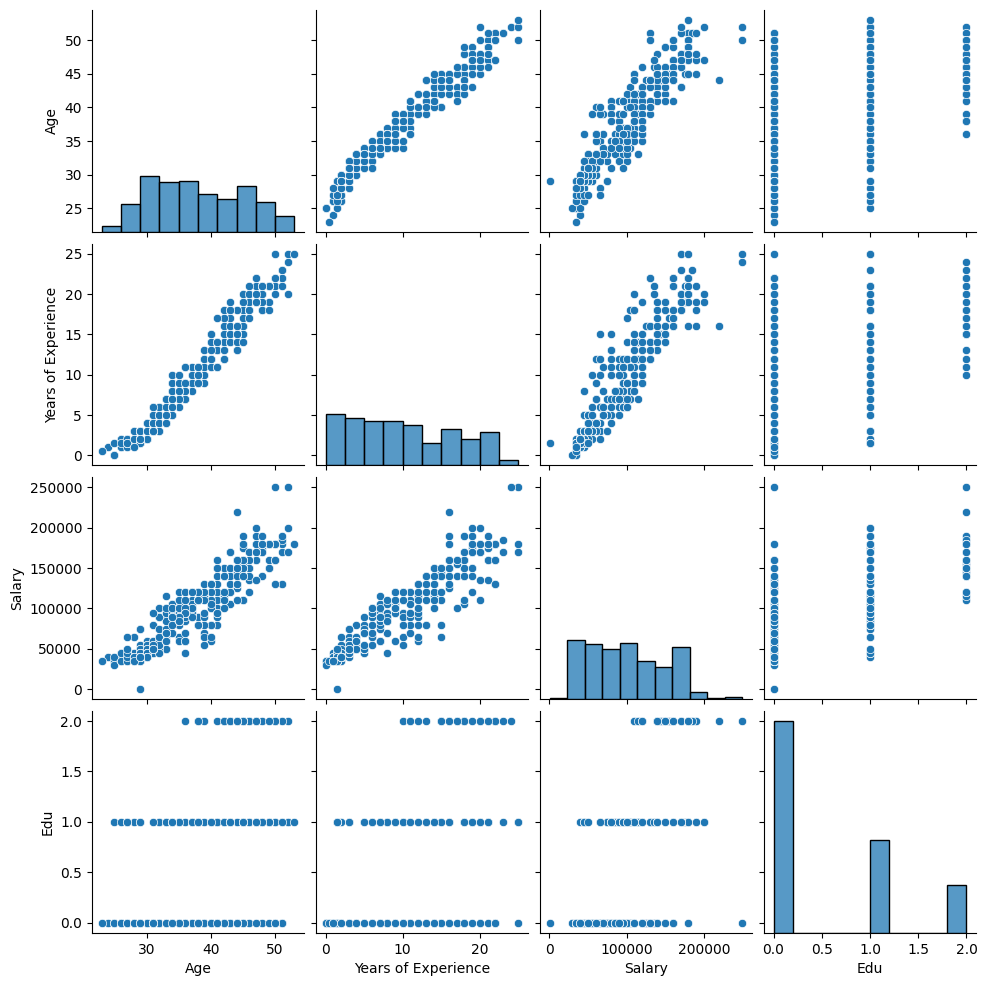

In [53]:
sns.pairplot(data =sal)

In [55]:
lb2 = LabelEncoder()

In [57]:
sal['gen'] = lb2.fit_transform(sal['Gender'])

In [58]:
sal.gen

0      1
1      0
2      1
3      0
4      1
      ..
370    0
371    1
372    0
373    1
374    0
Name: gen, Length: 373, dtype: int64

#Prediction

In [59]:
df = sal.copy()

In [60]:
df.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary,Edu,gen
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0,0,1
1,28.0,Female,Master's,Data Analyst,3.0,65000.0,1,0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0,2,1
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0,0,0
4,52.0,Male,Master's,Director,20.0,200000.0,1,1


<ipython-input-62-6c983c4d10bc>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


<Axes: >

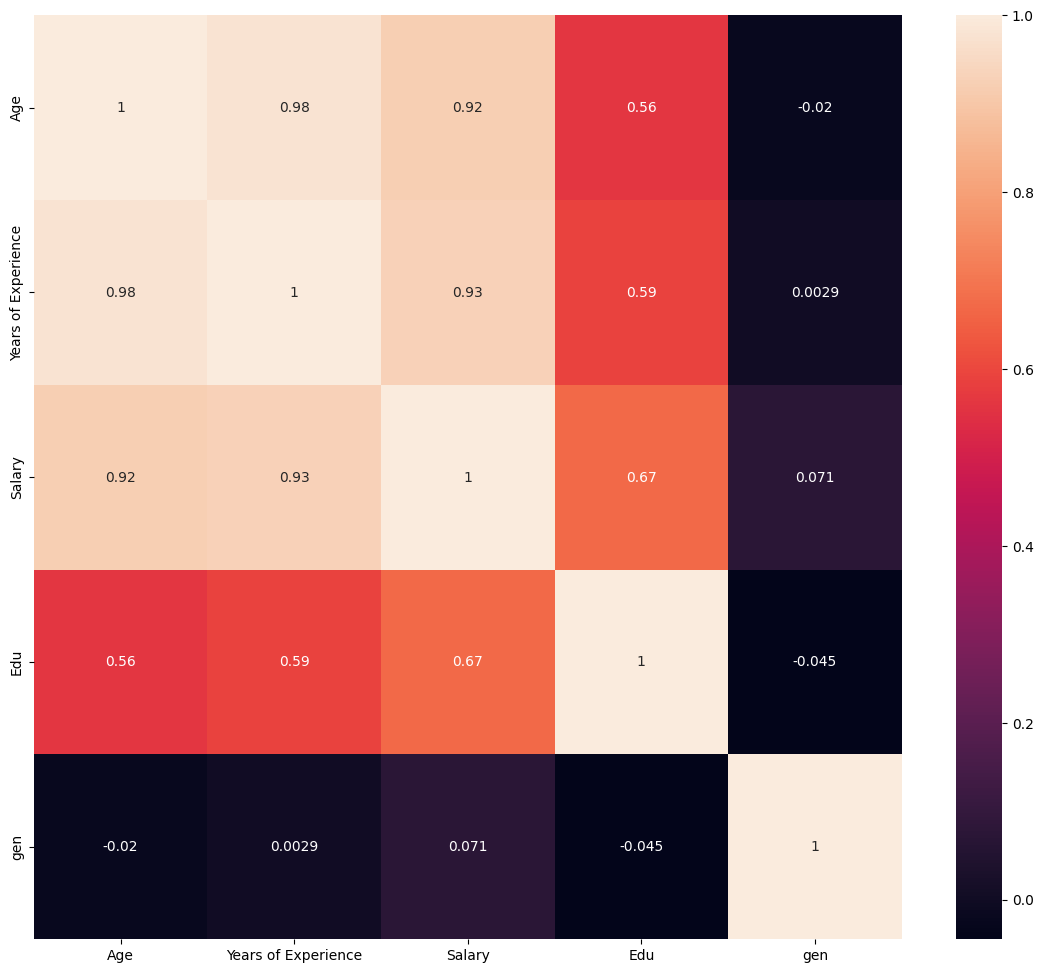

In [62]:
plt.figure(figsize=(14,12))
sns.heatmap(df.corr(),annot=True)

In [63]:
x = df.loc[:,['Age','Years of Experience','Edu','gen']]
x[:2]

,Age,Years of Experience,Edu,gen
0,32.0,5.0,0,1
1,28.0,3.0,1,0


In [64]:
y = sal.Salary

In [65]:
y[:2]

0    90000.0
1    65000.0
Name: Salary, dtype: float64

In [66]:
from sklearn.model_selection import train_test_split

In [67]:
x_train,x_test,y_train,y_test = train_test_split(x,y,train_size=.8)

In [68]:
from sklearn.linear_model import LinearRegression

In [69]:
model = LinearRegression()

In [70]:
model.fit(x_train,y_train)

LinearRegression()

In [71]:
y_pred = model.predict(x_test)

In [72]:
y_pred

array([ 47887.72955912,  40735.89186046,  45407.41357589,  47454.67659209,
        60595.71283692, 140136.72333402, 143058.73883958, 153472.56620604,
        90087.68749528, 166417.57223579, 163835.5296613 , 125865.39391825,
       149684.44353527,  81288.07017799,  46529.06019153,  99295.43476545,
       173774.08670484, 160624.40390471, 127327.01346497, 102897.39736432,
       110780.04483635, 101147.89115445,  45407.41357589, 150159.7138582 ,
       147679.39787496,  95982.58241761,  81814.20318097, 119444.36599294,
       166622.24900617, 171192.04413035,  87607.37151205,  70227.86651882,
        49841.91253938, 106736.38271515, 145199.08189173, 159079.57446522,
        89561.5544923 ,  40735.89186046,  39079.46568653,  49009.37617476,
       124846.69748174, 109216.69869838,  88439.90787666,  86876.56173869,
        52322.22852261, 165789.71264155,  61121.8458399 , 167980.91837376,
       150992.25022281,  49009.37617476,  87607.37151205,  47887.72955912,
       162918.55981604,  

In [73]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [74]:
mean_absolute_error(y_test,y_pred)

9332.159755855064

In [75]:
mean_squared_error(y_test,y_pred)

169213587.19214514

In [76]:
r2_score(y_test,y_pred)

0.9274351082987736

In [79]:
model.score(x_train,y_train)

0.8931584354087223

#pickel

In [80]:
import pickle
filename = 'sal_model.sav'

In [81]:
pickle.dump(model,open(filename,'wb'))

In [83]:
load_model = pickle.load(open(filename, 'rb'))

In [84]:
model_score_r1 = load_model.score(x_test,y_test)

In [85]:
model_score_r1

0.9274351082987736